In [1]:
import numpy as np
import matplotlib.pyplot as plt


from hnc import  HNC_solver
from qsps import *


# Two Species

Here we do QSP interactions between electrons and one ion type. 

Using $\tilde{r}\equiv r/r_s$, we implement potentials 
\begin{align}
\beta v_{ee}(\tilde{r}) &=  \frac{\Gamma_{ee}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right) +  \ln2 \exp\left[-\tilde{r}^2 r_s^2/(\pi \Lambda_e^2 \ln 2)\right]\\
\beta v_{ei}(\tilde{r}) &=  \frac{\Gamma_{ei}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right)\\
\beta v_{ii}(\tilde{r}) &=  \frac{\Gamma_{ii}}{\tilde{r}}
\end{align}
For  
\begin{align}
\Gamma_{ee}&=\frac{\beta e^2}{r_s}\\
\Gamma_{ei}&=\frac{\beta Z_i e^2}{r_s}\\
\Gamma_{ii}&=\frac{\beta Z_i^2 e^2}{r_s}\\
\end{align}

Plug into get potentials

In [2]:
# ri = QSP_HNC.rs_from_n(6.03e30*aB**3)
ri = 0.4473#qsp.rs_from_n(1.8e31*aB**3)
Te = 0.34*eV 
Ti   = 0.34*eV 
Z, A = 1, 1
Zstar= 1

qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)


Λee = 0.491
Λei = 0.347
Γii=178.917, Γie=-0.338, Γee=0.338 
r_i=0.447
r_e=0.447
θ  =1.36e-03


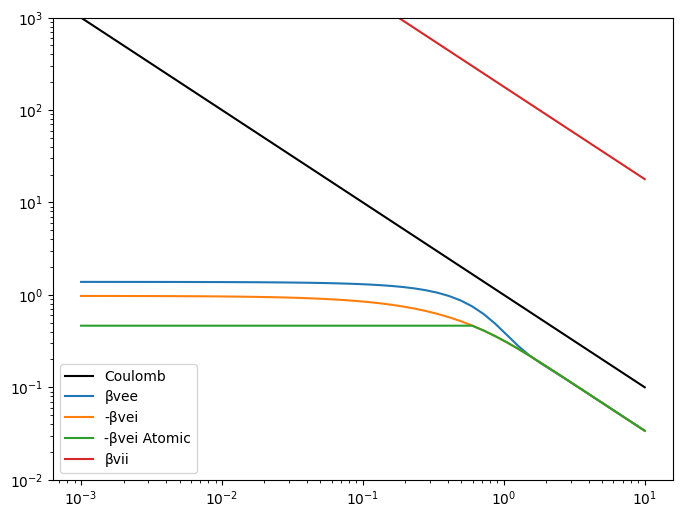

In [3]:

fig, ax = plt.subplots(figsize=(8,6),facecolor='w')

xs = np.geomspace(1e-3,10)
ax.plot(xs, 1/xs,'-k',label='Coulomb')
# ax.plot(xs,qsp.βv_Deutsch(1,xs, qsp.Λee),'--',label='Deutsch')
# ax.plot(xs,qsp.βv_Kelbg(1,xs,qsp.Λee),label='Kelbg')
# ax.plot(xs,qsp.βv_Pauli(xs,qsp.Λee),'-.',label='Pauli')

ax.plot(xs, qsp.βvee(xs),label='βvee')
ax.plot(xs, -qsp.βvei(xs),label='-βvei')
ax.plot(xs, -qsp.βvei_atomic(xs),label='-βvei Atomic')
ax.plot(xs, qsp.βvii(xs),label='βvii')

ax.set_yscale('log')
ax.set_ylim(1e-2,1e3)
ax.set_xscale('log')
ax.legend()

First, we initialize the hnc

In [4]:
N_species = 2
Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                    [qsp.Γei,  qsp.Γee]])


names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc2 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-8,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e0), 
                 R_max=5, N_bins=500, names=names, dst_type=3)


In [5]:
βu_r_matrix = np.array([[qsp.βvii(hnc2.r_array), qsp.βvei(hnc2.r_array)],
                        [qsp.βvei(hnc2.r_array), qsp.βvee(hnc2.r_array)]])

hnc2.set_βu_matrix(βu_r_matrix)
# hnc2.initialize_guess()
hnc2.initialize_c_k()
hnc2.set_C_matrix()

In [6]:
hnc2.num_iterations=300
hnc2.HNC_solve(alpha_method='best', alpha_Picard = 1e-1, alpha_oz = 1e-4, h_max=1e4)


 HNC min: [0.5] True Optimization terminated successfully.
0: Err in c_r: 1.77e+02, OZ: 2.74e-01, HNC: 1.13e-02
 HNC min: [0.5] True Optimization terminated successfully.
1: Err in c_r: 1.07e+02, OZ: 2.60e-01, HNC: 5.64e-03
 HNC min: [0.5] True Optimization terminated successfully.
2: Err in c_r: 6.48e+01, OZ: 2.47e-01, HNC: 1.02e-02
 HNC min: [0.5] True Optimization terminated successfully.
3: Err in c_r: 4.00e+01, OZ: 2.34e-01, HNC: 2.87e-01
 HNC min: [0.5] True Optimization terminated successfully.
4: Err in c_r: 2.55e+01, OZ: 2.20e-01, HNC: 3.13e+00
 HNC min: [0.5] True Optimization terminated successfully.
5: Err in c_r: 1.70e+01, OZ: 2.12e-01, HNC: 3.12e+00
 HNC min: [0.5] True Optimization terminated successfully.
6: Err in c_r: 1.20e+01, OZ: 2.03e-01, HNC: 9.35e+00
 HNC min: [0.5] True Optimization terminated successfully.
7: Err in c_r: 8.90e+00, OZ: 1.99e-01, HNC: 4.62e+00
 HNC min: [0.5] True Optimization terminated successfully.
8: Err in c_r: 6.98e+00, OZ: 1.92e-01, HNC: 1

 HNC min: [0.5] True Optimization terminated successfully.
82: Err in c_r: 2.08e-01, OZ: 2.03e-01, HNC: 8.85e-03
 HNC min: [0.5] True Optimization terminated successfully.
83: Err in c_r: 2.03e-01, OZ: 2.03e-01, HNC: 8.56e-03
 HNC min: [0.5] True Optimization terminated successfully.
84: Err in c_r: 1.99e-01, OZ: 2.04e-01, HNC: 8.29e-03
 HNC min: [0.5] True Optimization terminated successfully.
85: Err in c_r: 1.95e-01, OZ: 2.05e-01, HNC: 8.02e-03
 HNC min: [0.5] True Optimization terminated successfully.
86: Err in c_r: 1.91e-01, OZ: 2.05e-01, HNC: 7.77e-03
 HNC min: [0.5] True Optimization terminated successfully.
87: Err in c_r: 1.87e-01, OZ: 2.06e-01, HNC: 7.52e-03
 HNC min: [0.5] True Optimization terminated successfully.
88: Err in c_r: 1.83e-01, OZ: 2.07e-01, HNC: 7.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
89: Err in c_r: 1.79e-01, OZ: 2.07e-01, HNC: 7.06e-03
 HNC min: [0.5] True Optimization terminated successfully.
90: Err in c_r: 1.75e-01, OZ: 2.08e-0

161: Err in c_r: 5.01e-02, OZ: 2.42e-01, HNC: 1.31e-03
 HNC min: [0.5] True Optimization terminated successfully.
162: Err in c_r: 4.93e-02, OZ: 2.42e-01, HNC: 1.29e-03
 HNC min: [0.5] True Optimization terminated successfully.
163: Err in c_r: 4.85e-02, OZ: 2.42e-01, HNC: 1.27e-03
 HNC min: [0.5] True Optimization terminated successfully.
164: Err in c_r: 4.77e-02, OZ: 2.42e-01, HNC: 1.25e-03
 HNC min: [0.5] True Optimization terminated successfully.
165: Err in c_r: 4.70e-02, OZ: 2.43e-01, HNC: 1.23e-03
 HNC min: [0.5] True Optimization terminated successfully.
166: Err in c_r: 4.63e-02, OZ: 2.43e-01, HNC: 1.21e-03
 HNC min: [0.5] True Optimization terminated successfully.
167: Err in c_r: 4.55e-02, OZ: 2.43e-01, HNC: 1.19e-03
 HNC min: [0.5] True Optimization terminated successfully.
168: Err in c_r: 4.48e-02, OZ: 2.43e-01, HNC: 1.17e-03
 HNC min: [0.5] True Optimization terminated successfully.
169: Err in c_r: 4.41e-02, OZ: 2.43e-01, HNC: 1.16e-03
 HNC min: [0.5] True Optimization

 HNC min: [0.5] True Optimization terminated successfully.
234: Err in c_r: 1.48e-02, OZ: 2.54e-01, HNC: 4.03e-04
 HNC min: [0.5] True Optimization terminated successfully.
235: Err in c_r: 1.45e-02, OZ: 2.54e-01, HNC: 3.96e-04
 HNC min: [0.5] True Optimization terminated successfully.
236: Err in c_r: 1.43e-02, OZ: 2.54e-01, HNC: 3.89e-04
 HNC min: [0.5] True Optimization terminated successfully.
237: Err in c_r: 1.41e-02, OZ: 2.54e-01, HNC: 3.83e-04
 HNC min: [0.5] True Optimization terminated successfully.
238: Err in c_r: 1.38e-02, OZ: 2.54e-01, HNC: 3.76e-04
 HNC min: [0.5] True Optimization terminated successfully.
239: Err in c_r: 1.36e-02, OZ: 2.54e-01, HNC: 3.70e-04
 HNC min: [0.5] True Optimization terminated successfully.
240: Err in c_r: 1.34e-02, OZ: 2.54e-01, HNC: 3.63e-04
 HNC min: [0.5] True Optimization terminated successfully.
241: Err in c_r: 1.32e-02, OZ: 2.55e-01, HNC: 3.57e-04
 HNC min: [0.5] True Optimization terminated successfully.
242: Err in c_r: 1.30e-02, OZ

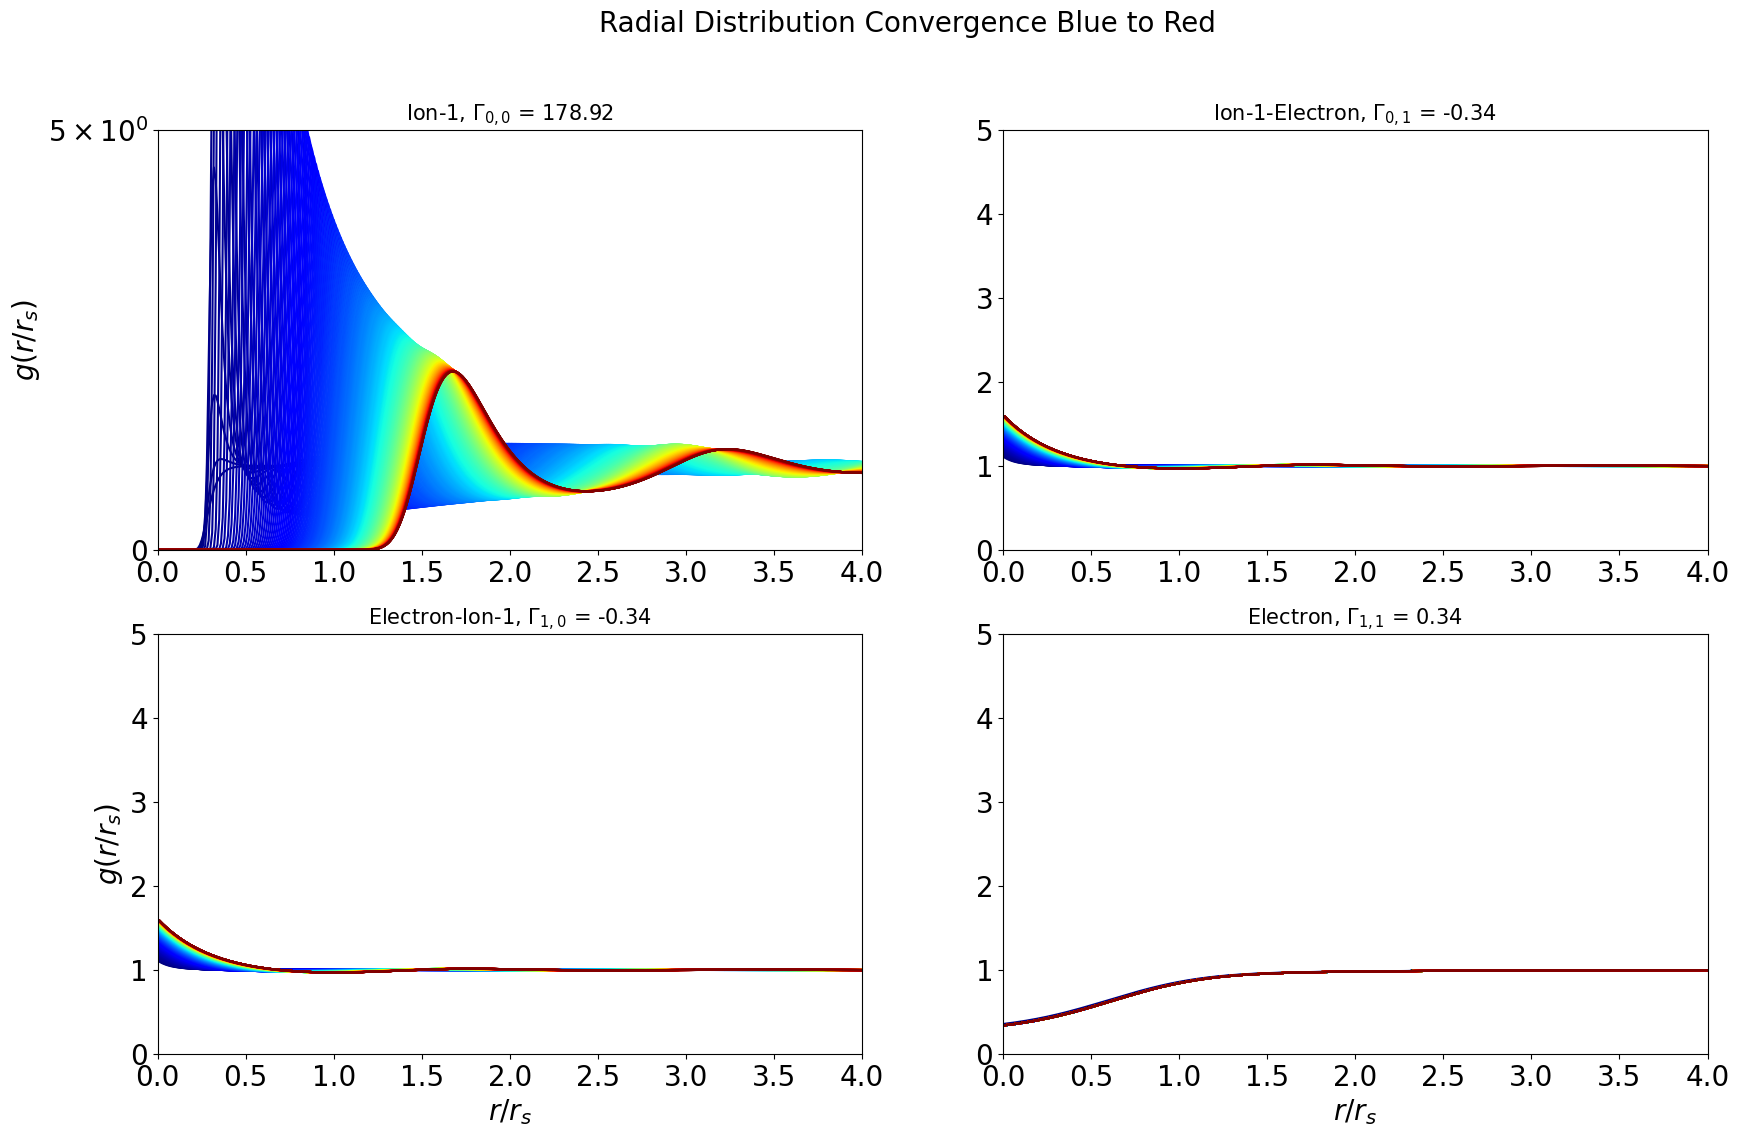

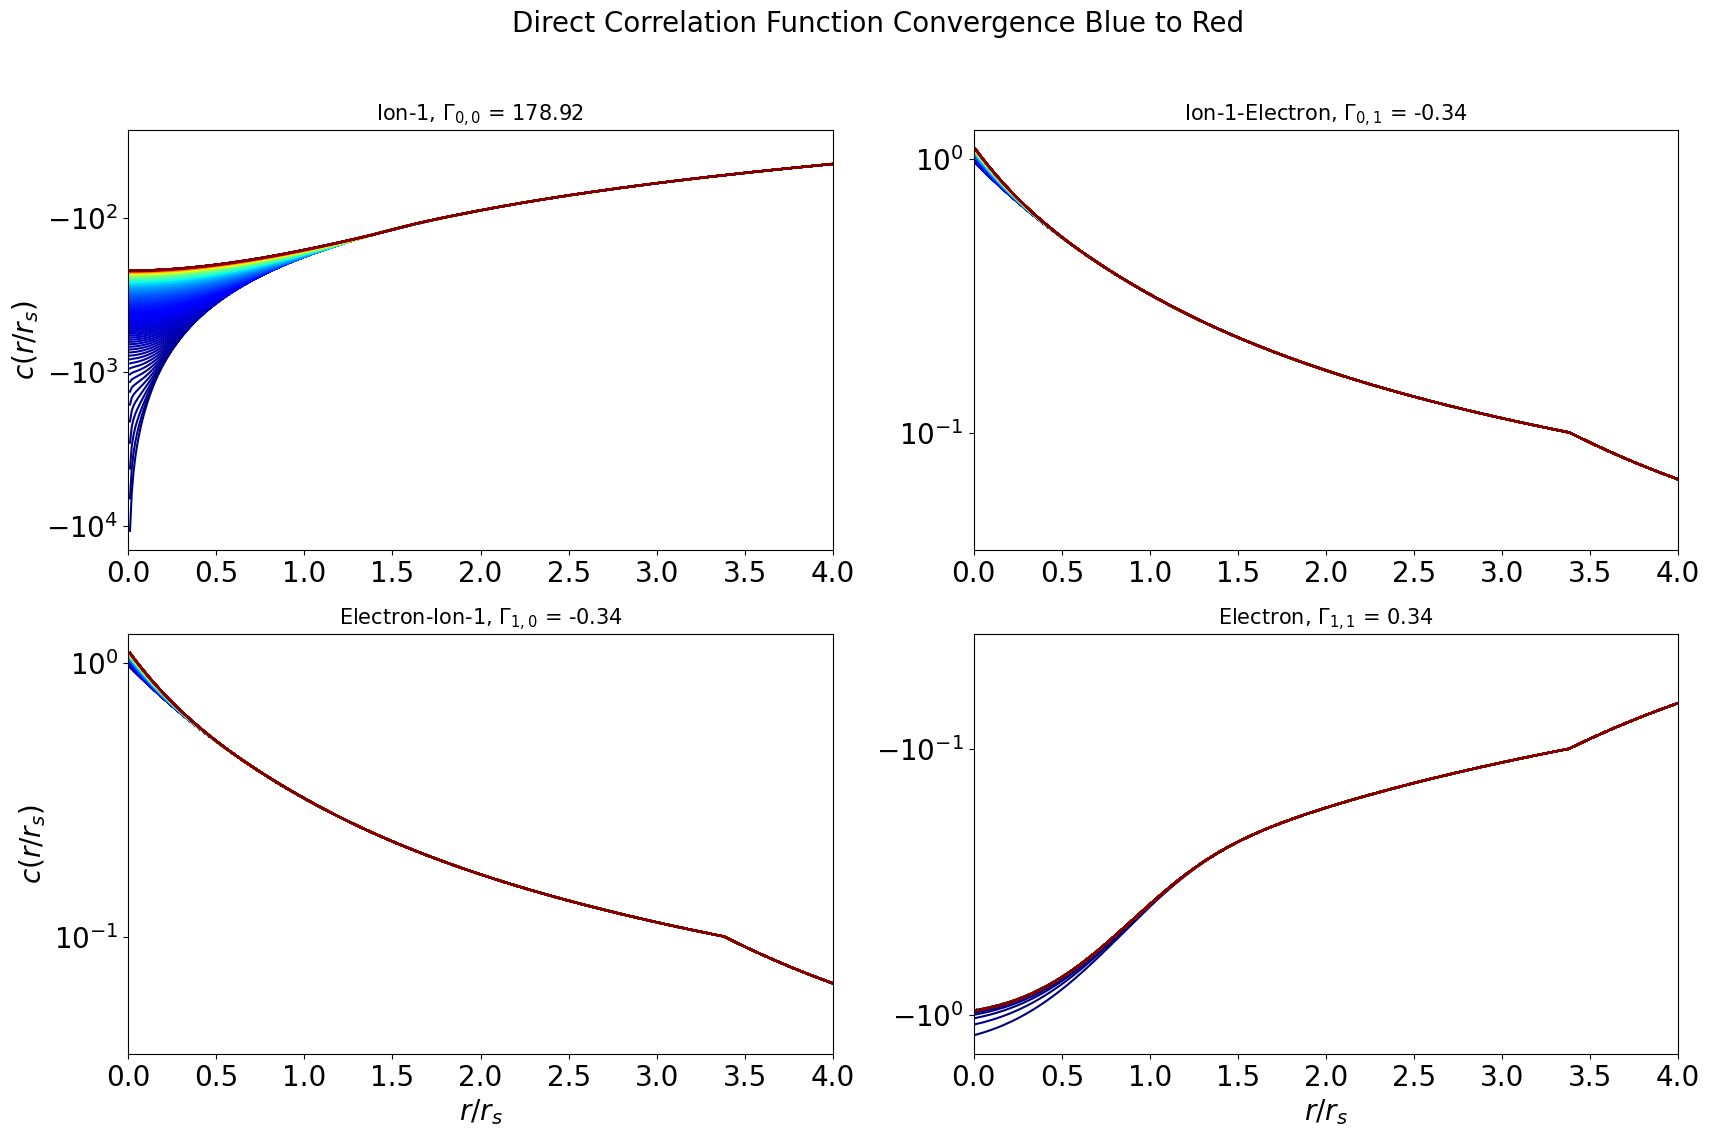

In [7]:
hnc2.plot_species_convergence_g(n_slices= int(len(hnc2.h_list)/1)  )
hnc2.plot_species_convergence_c(n_slices= int(len(hnc2.h_list)/1)  )

In [8]:
# hnc2.plot_g_vs_murillo(gmax=3)
# hnc2.plot_g_vs_murillo()

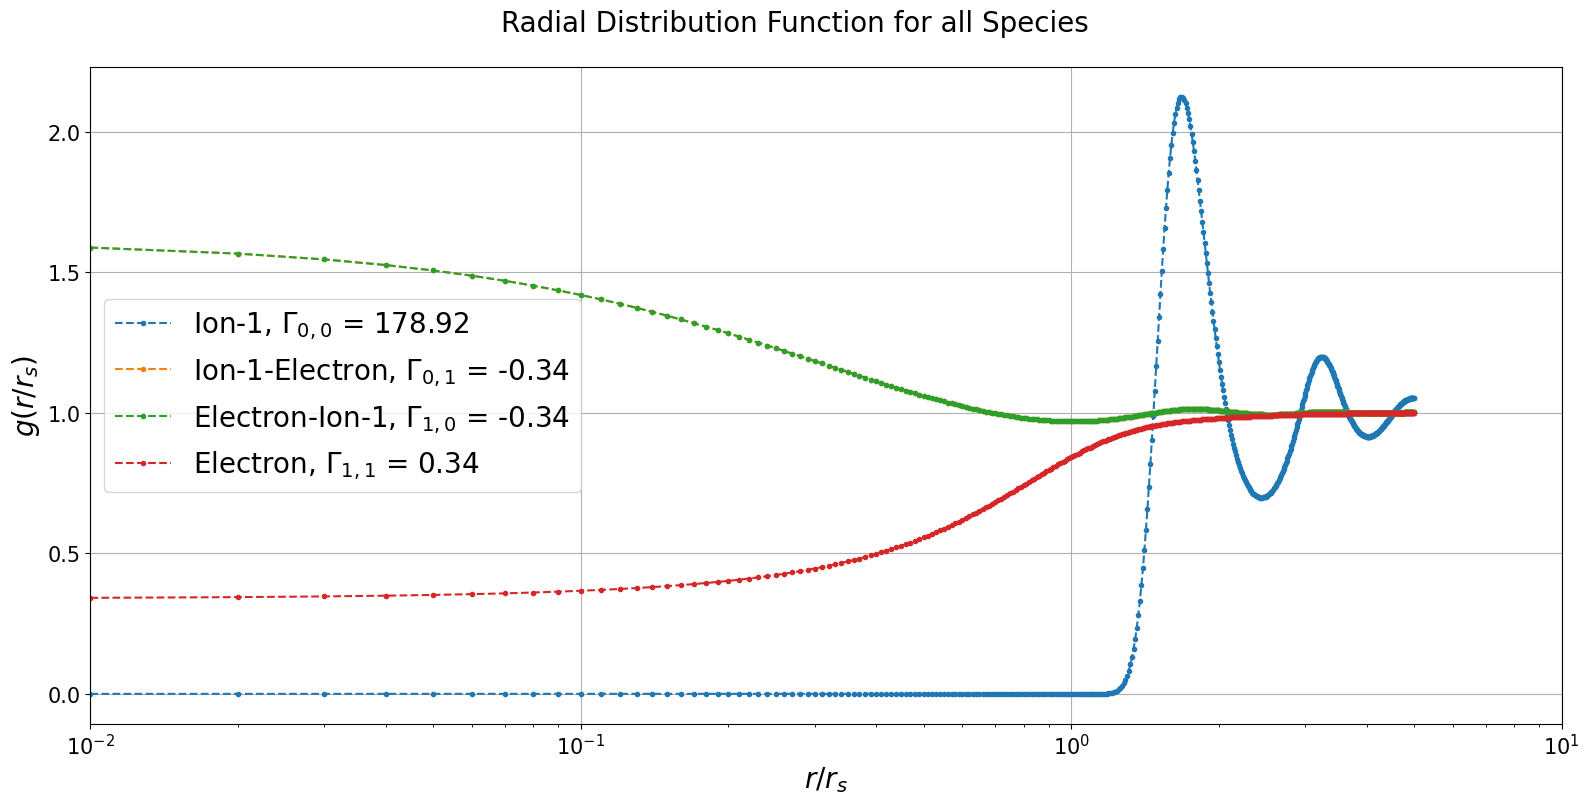

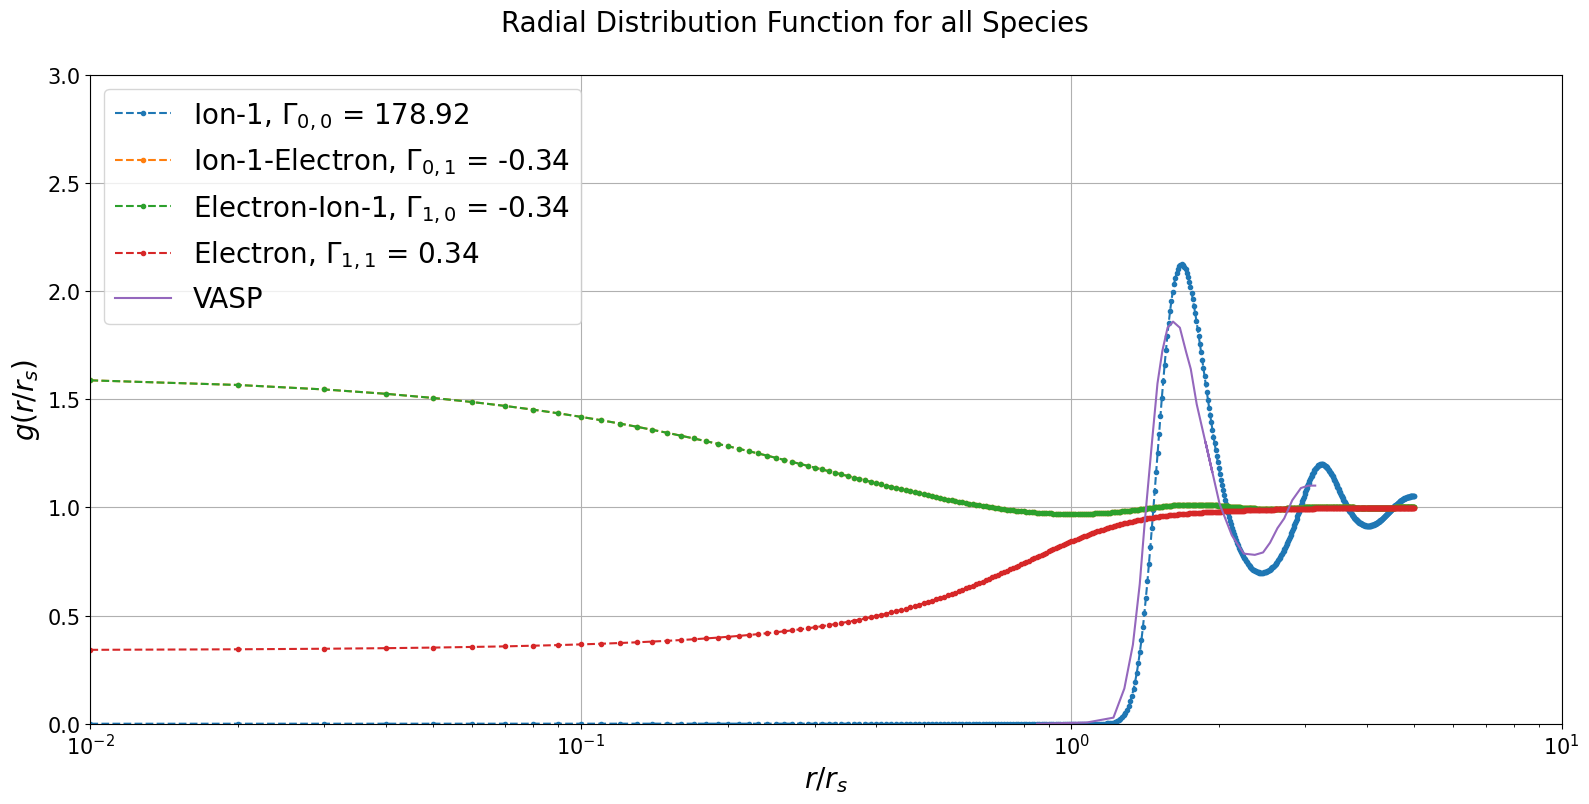

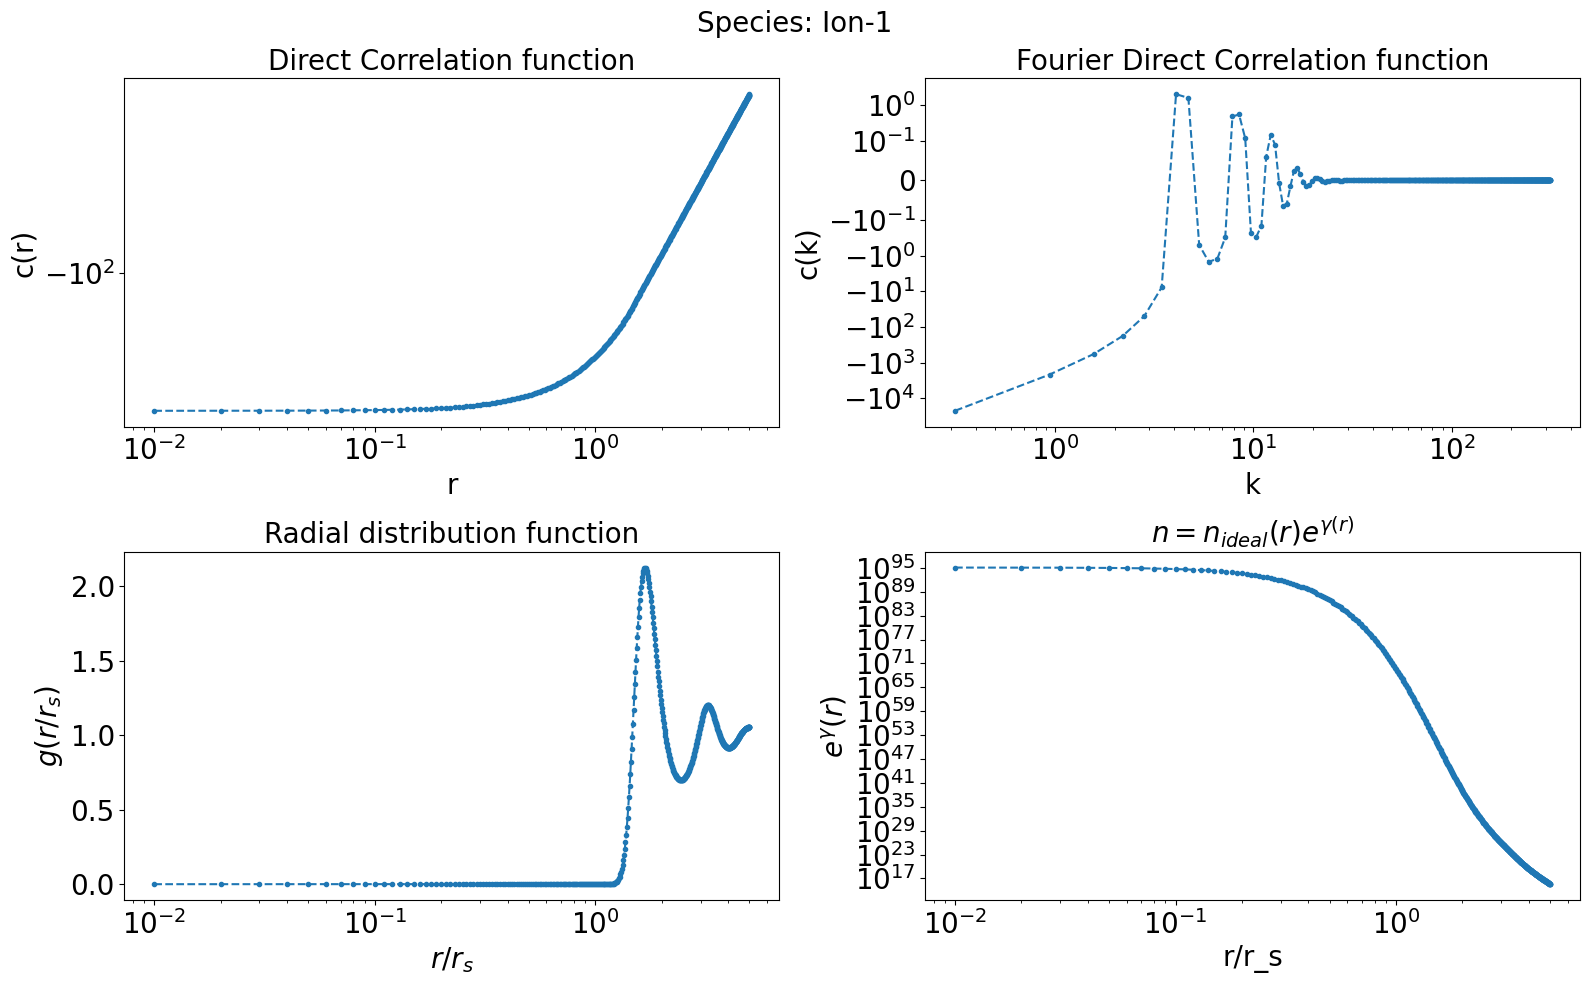

In [9]:
hnc2.plot_g_all_species()
# hnc2.plot_g_all_species(gmax=3,data_to_compare=['/home/zach/plasma/datasets/RDFs/Al_1.0eV_rs3_VASP.txt'], data_names=['VASP'])
hnc2.plot_g_all_species(gmax=3,data_to_compare=['/home/zach/plasma/datasets/RDFs/Al_0.5eV_rs3_KS-MD.txt'], data_names=['VASP'])
hnc2.plot_species((0,0))


In [10]:
# np.savetxt("/home/zach/Downloads/Al_1.0eV_r3_QSPHNC.txt",np.array([hnc2.r_array,hnc2.h_r_matrix[0,0]+1]).T)

# Effective Potentials

In [11]:
hnc_extended = HNC_solver(2, Gamma=Gamma, kappa=kappa, tol=1e-7,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e0), 
                 R_max=10, N_bins=500, names=names, dst_type=3)

hnc_extended.βω_r_matrix = np.zeros_like(hnc_extended.h_r_matrix)
hnc_extended.βω_r_matrix[:,:, :hnc2.N_bins] = hnc2.βω_r_matrix

In [12]:
hnc2.invert_HNC(1)

In [13]:
# fig, ax = plt.subplots()

# ax.plot(hnc2.r_array, 1+hnc2.heff_r_matrix[0,0],label= 'h')
# ax.plot(hnc2.r_array, hnc2.ceff_r_matrix[0,0],label='c')
# ax.plot(hnc2.r_array,np.log(1+hnc2.heff_r_matrix)[0,0],label='log(1+h)')
# ax.set_yscale('symlog',linthresh=1e-5)
# ax.set_xlim(1e-1,2)
# # ax.set_xscale('log')
# ax.legend()

In [14]:
Te = qsp.Ti
from pandas import read_csv
from scipy.interpolate import interp1d
luke_file = '/home/zach/plasma/atomic_forces/data/Al_T0p5_tab.lammps.PAIR'

luke_data = read_csv(luke_file ,delim_whitespace=True,header=3, names=['r [A]','V [eV]','F [eV/A]'])
luke_r, luke_βV = 1e-10/aB/ri*luke_data['r [A]'], 1/(Te/eV)*luke_data['V [eV]']
luke_r[165], luke_βV[165]
luke_βV_function = interp1d(luke_r, luke_βV,fill_value='extrapolate',bounds_error=False)

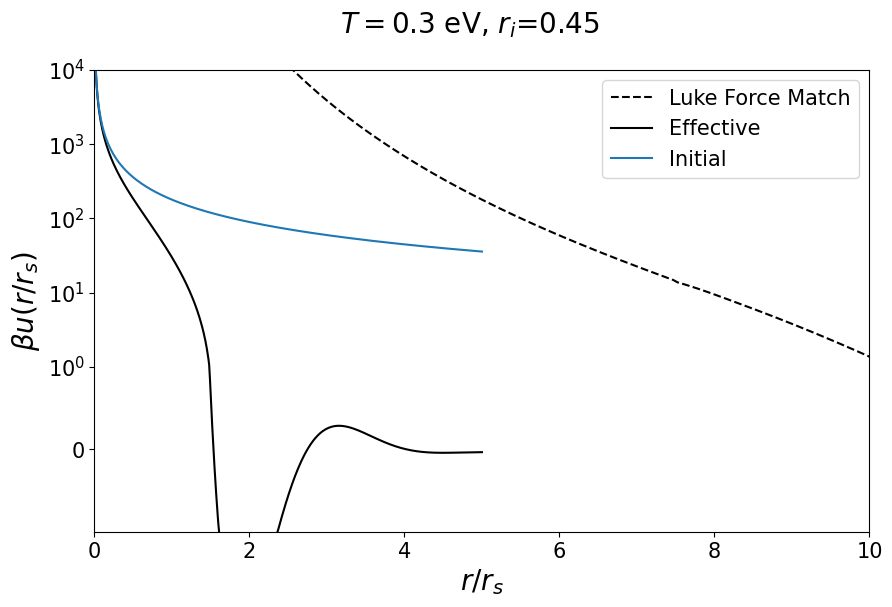

In [15]:
fig, ax = plt.subplots(figsize=(10,6),facecolor='w')
fig.suptitle(r"$T=${0:.1f} eV, $r_i$={1:.2f}".format(Te/eV,ri), fontsize=20)

ax.plot(luke_r, luke_βV,'k--', label="Luke Force Match")
ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0],'k-', label="Effective")
ax.plot(hnc2.r_array, hnc2.βu_r_matrix[0,0], label="Initial")
# ax.plot(hnc_extended.r_array, hnc_extended.βueff_r_matrix[0,0],'k-', label="Effective")
# ax.plot(hnc_extended.r_array, hnc_extended.βu_r_matrix[0,0], label="Initial")
# ax.plot(hnc2.r_array, qsp.βv_Yukawa(hnc2.r_array),label="Yukawa")
ax.set_ylabel(r'$\beta u(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
ax.set_ylim(-1,1e4)
ax.set_xlim(0,10)
ax.set_yscale('symlog',linthresh=1)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)

# Check!

In [16]:
# I_plus_h_rho_inverse = hnc2.invert_matrix(hnc2.I[:,:,np.newaxis] + hnc2.heff_k_matrix*hnc2.rhoeff[:,np.newaxis,np.newaxis])
# hnc2.ceff_k_matrix = hnc2.A_times_B(I_plus_h_rho_inverse, hnc2.heff_k_matrix)[0,0]
# hnc2.ceff_r_matrix = hnc2.FT_k_2_r_matrix(hnc2.ceff_k_matrix)

# # Approximate with HNC
# hnc2.βueff_r_matrix = hnc2.heff_r_matrix - hnc2.ceff_r_matrix + hnc2.βωeff_r_matrix


In [17]:
N_species = 1
Gamma = np.array(  [[1]])
names = ["Ion Effective"] 
kappa = 1
rho = np.array([3/(4*np.pi)])
hnc_check = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-3, kappa_multiscale=1,
                       rho = rho, num_iterations=int(1e4), R_max=10, N_bins=500, names=names)


# check
βu_r_matrix = np.nan_to_num( hnc2.βueff_r_matrix,nan = -np.log(1.e-16), posinf=-np.log(1e-16) ).copy()
hnc_check.set_βu_matrix(βu_r_matrix)
hnc_check.c_k_matrix = hnc2.ceff_k_matrix
hnc_check.HNC_solve(alpha_method='fixed')


0: Err in c_r: 4.56e+00, OZ: 6.40e+01, HNC: 9.42e+01
1: Err in c_r: 7.73e-01, OZ: 1.18e+00, HNC: 6.50e-02
2: Err in c_r: 7.27e-01, OZ: 1.16e+00, HNC: 6.33e-02
3: Err in c_r: 6.84e-01, OZ: 1.14e+00, HNC: 6.15e-02
4: Err in c_r: 6.45e-01, OZ: 1.12e+00, HNC: 5.97e-02
5: Err in c_r: 6.08e-01, OZ: 1.10e+00, HNC: 5.78e-02
6: Err in c_r: 5.74e-01, OZ: 1.08e+00, HNC: 5.58e-02
7: Err in c_r: 5.43e-01, OZ: 1.07e+00, HNC: 5.39e-02
8: Err in c_r: 5.13e-01, OZ: 1.05e+00, HNC: 5.20e-02
9: Err in c_r: 4.86e-01, OZ: 1.04e+00, HNC: 5.01e-02
10: Err in c_r: 4.61e-01, OZ: 1.02e+00, HNC: 4.83e-02
11: Err in c_r: 4.38e-01, OZ: 1.01e+00, HNC: 4.66e-02
12: Err in c_r: 4.16e-01, OZ: 9.98e-01, HNC: 4.49e-02
13: Err in c_r: 3.96e-01, OZ: 9.86e-01, HNC: 4.34e-02
14: Err in c_r: 3.77e-01, OZ: 9.75e-01, HNC: 4.19e-02
15: Err in c_r: 3.59e-01, OZ: 9.65e-01, HNC: 4.06e-02
16: Err in c_r: 3.43e-01, OZ: 9.55e-01, HNC: 3.93e-02
17: Err in c_r: 3.28e-01, OZ: 9.45e-01, HNC: 3.82e-02
18: Err in c_r: 3.14e-01, OZ: 9.36e-01

177: Err in c_r: 1.87e-02, OZ: 8.57e-01, HNC: 4.14e-03
178: Err in c_r: 1.86e-02, OZ: 8.57e-01, HNC: 4.11e-03
179: Err in c_r: 1.85e-02, OZ: 8.57e-01, HNC: 4.08e-03
180: Err in c_r: 1.85e-02, OZ: 8.57e-01, HNC: 4.06e-03
181: Err in c_r: 1.84e-02, OZ: 8.57e-01, HNC: 4.03e-03
182: Err in c_r: 1.83e-02, OZ: 8.57e-01, HNC: 4.01e-03
183: Err in c_r: 1.83e-02, OZ: 8.57e-01, HNC: 3.98e-03
184: Err in c_r: 1.82e-02, OZ: 8.57e-01, HNC: 3.96e-03
185: Err in c_r: 1.81e-02, OZ: 8.57e-01, HNC: 3.94e-03
186: Err in c_r: 1.81e-02, OZ: 8.57e-01, HNC: 3.92e-03
187: Err in c_r: 1.80e-02, OZ: 8.57e-01, HNC: 3.89e-03
188: Err in c_r: 1.80e-02, OZ: 8.57e-01, HNC: 3.88e-03
189: Err in c_r: 1.79e-02, OZ: 8.57e-01, HNC: 3.86e-03
190: Err in c_r: 1.79e-02, OZ: 8.57e-01, HNC: 3.84e-03
191: Err in c_r: 1.78e-02, OZ: 8.57e-01, HNC: 3.82e-03
192: Err in c_r: 1.78e-02, OZ: 8.57e-01, HNC: 3.80e-03
193: Err in c_r: 1.77e-02, OZ: 8.57e-01, HNC: 3.79e-03
194: Err in c_r: 1.77e-02, OZ: 8.57e-01, HNC: 3.77e-03
195: Err i

355: Err in c_r: 1.37e-02, OZ: 8.76e-01, HNC: 2.50e-03
356: Err in c_r: 1.37e-02, OZ: 8.76e-01, HNC: 2.49e-03
357: Err in c_r: 1.37e-02, OZ: 8.76e-01, HNC: 2.49e-03
358: Err in c_r: 1.37e-02, OZ: 8.76e-01, HNC: 2.48e-03
359: Err in c_r: 1.37e-02, OZ: 8.76e-01, HNC: 2.48e-03
360: Err in c_r: 1.36e-02, OZ: 8.76e-01, HNC: 2.48e-03
361: Err in c_r: 1.36e-02, OZ: 8.76e-01, HNC: 2.47e-03
362: Err in c_r: 1.36e-02, OZ: 8.76e-01, HNC: 2.47e-03
363: Err in c_r: 1.36e-02, OZ: 8.76e-01, HNC: 2.46e-03
364: Err in c_r: 1.36e-02, OZ: 8.76e-01, HNC: 2.46e-03
365: Err in c_r: 1.35e-02, OZ: 8.76e-01, HNC: 2.45e-03
366: Err in c_r: 1.35e-02, OZ: 8.76e-01, HNC: 2.45e-03
367: Err in c_r: 1.35e-02, OZ: 8.76e-01, HNC: 2.45e-03
368: Err in c_r: 1.35e-02, OZ: 8.76e-01, HNC: 2.44e-03
369: Err in c_r: 1.35e-02, OZ: 8.76e-01, HNC: 2.44e-03
370: Err in c_r: 1.35e-02, OZ: 8.76e-01, HNC: 2.43e-03
371: Err in c_r: 1.34e-02, OZ: 8.76e-01, HNC: 2.43e-03
372: Err in c_r: 1.34e-02, OZ: 8.76e-01, HNC: 2.42e-03
373: Err i

530: Err in c_r: 1.09e-02, OZ: 8.61e-01, HNC: 2.06e-03
531: Err in c_r: 1.09e-02, OZ: 8.61e-01, HNC: 2.06e-03
532: Err in c_r: 1.09e-02, OZ: 8.60e-01, HNC: 2.06e-03
533: Err in c_r: 1.09e-02, OZ: 8.60e-01, HNC: 2.06e-03
534: Err in c_r: 1.09e-02, OZ: 8.60e-01, HNC: 2.06e-03
535: Err in c_r: 1.09e-02, OZ: 8.60e-01, HNC: 2.06e-03
536: Err in c_r: 1.08e-02, OZ: 8.60e-01, HNC: 2.05e-03
537: Err in c_r: 1.08e-02, OZ: 8.59e-01, HNC: 2.05e-03
538: Err in c_r: 1.08e-02, OZ: 8.59e-01, HNC: 2.05e-03
539: Err in c_r: 1.08e-02, OZ: 8.59e-01, HNC: 2.05e-03
540: Err in c_r: 1.08e-02, OZ: 8.59e-01, HNC: 2.05e-03
541: Err in c_r: 1.08e-02, OZ: 8.59e-01, HNC: 2.05e-03
542: Err in c_r: 1.08e-02, OZ: 8.59e-01, HNC: 2.05e-03
543: Err in c_r: 1.07e-02, OZ: 8.58e-01, HNC: 2.05e-03
544: Err in c_r: 1.07e-02, OZ: 8.58e-01, HNC: 2.04e-03
545: Err in c_r: 1.07e-02, OZ: 8.58e-01, HNC: 2.04e-03
546: Err in c_r: 1.07e-02, OZ: 8.58e-01, HNC: 2.04e-03
547: Err in c_r: 1.07e-02, OZ: 8.58e-01, HNC: 2.04e-03
548: Err i

704: Err in c_r: 8.67e-03, OZ: 8.29e-01, HNC: 1.83e-03
705: Err in c_r: 8.66e-03, OZ: 8.29e-01, HNC: 1.83e-03
706: Err in c_r: 8.64e-03, OZ: 8.29e-01, HNC: 1.83e-03
707: Err in c_r: 8.63e-03, OZ: 8.29e-01, HNC: 1.83e-03
708: Err in c_r: 8.62e-03, OZ: 8.29e-01, HNC: 1.83e-03
709: Err in c_r: 8.61e-03, OZ: 8.29e-01, HNC: 1.83e-03
710: Err in c_r: 8.60e-03, OZ: 8.29e-01, HNC: 1.82e-03
711: Err in c_r: 8.58e-03, OZ: 8.28e-01, HNC: 1.82e-03
712: Err in c_r: 8.57e-03, OZ: 8.28e-01, HNC: 1.82e-03
713: Err in c_r: 8.56e-03, OZ: 8.28e-01, HNC: 1.82e-03
714: Err in c_r: 8.55e-03, OZ: 8.28e-01, HNC: 1.82e-03
715: Err in c_r: 8.54e-03, OZ: 8.28e-01, HNC: 1.82e-03
716: Err in c_r: 8.52e-03, OZ: 8.28e-01, HNC: 1.81e-03
717: Err in c_r: 8.51e-03, OZ: 8.28e-01, HNC: 1.81e-03
718: Err in c_r: 8.50e-03, OZ: 8.27e-01, HNC: 1.81e-03
719: Err in c_r: 8.49e-03, OZ: 8.27e-01, HNC: 1.81e-03
720: Err in c_r: 8.48e-03, OZ: 8.27e-01, HNC: 1.81e-03
721: Err in c_r: 8.46e-03, OZ: 8.27e-01, HNC: 1.81e-03
722: Err i

871: Err in c_r: 6.81e-03, OZ: 8.13e-01, HNC: 1.52e-03
872: Err in c_r: 6.80e-03, OZ: 8.13e-01, HNC: 1.52e-03
873: Err in c_r: 6.79e-03, OZ: 8.12e-01, HNC: 1.52e-03
874: Err in c_r: 6.78e-03, OZ: 8.12e-01, HNC: 1.52e-03
875: Err in c_r: 6.77e-03, OZ: 8.12e-01, HNC: 1.52e-03
876: Err in c_r: 6.76e-03, OZ: 8.12e-01, HNC: 1.51e-03
877: Err in c_r: 6.75e-03, OZ: 8.12e-01, HNC: 1.51e-03
878: Err in c_r: 6.74e-03, OZ: 8.12e-01, HNC: 1.51e-03
879: Err in c_r: 6.73e-03, OZ: 8.12e-01, HNC: 1.51e-03
880: Err in c_r: 6.72e-03, OZ: 8.12e-01, HNC: 1.51e-03
881: Err in c_r: 6.71e-03, OZ: 8.12e-01, HNC: 1.50e-03
882: Err in c_r: 6.70e-03, OZ: 8.12e-01, HNC: 1.50e-03
883: Err in c_r: 6.69e-03, OZ: 8.12e-01, HNC: 1.50e-03
884: Err in c_r: 6.68e-03, OZ: 8.12e-01, HNC: 1.50e-03
885: Err in c_r: 6.67e-03, OZ: 8.12e-01, HNC: 1.50e-03
886: Err in c_r: 6.66e-03, OZ: 8.12e-01, HNC: 1.49e-03
887: Err in c_r: 6.65e-03, OZ: 8.12e-01, HNC: 1.49e-03
888: Err in c_r: 6.64e-03, OZ: 8.12e-01, HNC: 1.49e-03
889: Err i

1041: Err in c_r: 5.27e-03, OZ: 8.08e-01, HNC: 1.19e-03
1042: Err in c_r: 5.26e-03, OZ: 8.08e-01, HNC: 1.19e-03
1043: Err in c_r: 5.25e-03, OZ: 8.08e-01, HNC: 1.18e-03
1044: Err in c_r: 5.24e-03, OZ: 8.08e-01, HNC: 1.18e-03
1045: Err in c_r: 5.24e-03, OZ: 8.08e-01, HNC: 1.18e-03
1046: Err in c_r: 5.23e-03, OZ: 8.08e-01, HNC: 1.18e-03
1047: Err in c_r: 5.22e-03, OZ: 8.08e-01, HNC: 1.18e-03
1048: Err in c_r: 5.21e-03, OZ: 8.08e-01, HNC: 1.17e-03
1049: Err in c_r: 5.20e-03, OZ: 8.08e-01, HNC: 1.17e-03
1050: Err in c_r: 5.20e-03, OZ: 8.08e-01, HNC: 1.17e-03
1051: Err in c_r: 5.19e-03, OZ: 8.08e-01, HNC: 1.17e-03
1052: Err in c_r: 5.18e-03, OZ: 8.08e-01, HNC: 1.17e-03
1053: Err in c_r: 5.17e-03, OZ: 8.08e-01, HNC: 1.17e-03
1054: Err in c_r: 5.17e-03, OZ: 8.08e-01, HNC: 1.16e-03
1055: Err in c_r: 5.16e-03, OZ: 8.08e-01, HNC: 1.16e-03
1056: Err in c_r: 5.15e-03, OZ: 8.08e-01, HNC: 1.16e-03
1057: Err in c_r: 5.14e-03, OZ: 8.08e-01, HNC: 1.16e-03
1058: Err in c_r: 5.13e-03, OZ: 8.08e-01, HNC: 1

1202: Err in c_r: 4.13e-03, OZ: 8.09e-01, HNC: 9.22e-04
1203: Err in c_r: 4.12e-03, OZ: 8.09e-01, HNC: 9.21e-04
1204: Err in c_r: 4.12e-03, OZ: 8.09e-01, HNC: 9.19e-04
1205: Err in c_r: 4.11e-03, OZ: 8.09e-01, HNC: 9.18e-04
1206: Err in c_r: 4.10e-03, OZ: 8.09e-01, HNC: 9.16e-04
1207: Err in c_r: 4.10e-03, OZ: 8.09e-01, HNC: 9.15e-04
1208: Err in c_r: 4.09e-03, OZ: 8.09e-01, HNC: 9.13e-04
1209: Err in c_r: 4.09e-03, OZ: 8.09e-01, HNC: 9.12e-04
1210: Err in c_r: 4.08e-03, OZ: 8.09e-01, HNC: 9.11e-04
1211: Err in c_r: 4.07e-03, OZ: 8.09e-01, HNC: 9.09e-04
1212: Err in c_r: 4.07e-03, OZ: 8.09e-01, HNC: 9.08e-04
1213: Err in c_r: 4.06e-03, OZ: 8.09e-01, HNC: 9.06e-04
1214: Err in c_r: 4.05e-03, OZ: 8.09e-01, HNC: 9.05e-04
1215: Err in c_r: 4.05e-03, OZ: 8.09e-01, HNC: 9.03e-04
1216: Err in c_r: 4.04e-03, OZ: 8.09e-01, HNC: 9.02e-04
1217: Err in c_r: 4.04e-03, OZ: 8.09e-01, HNC: 9.01e-04
1218: Err in c_r: 4.03e-03, OZ: 8.09e-01, HNC: 8.99e-04
1219: Err in c_r: 4.02e-03, OZ: 8.09e-01, HNC: 8

1383: Err in c_r: 3.15e-03, OZ: 8.10e-01, HNC: 6.98e-04
1384: Err in c_r: 3.14e-03, OZ: 8.10e-01, HNC: 6.97e-04
1385: Err in c_r: 3.14e-03, OZ: 8.10e-01, HNC: 6.96e-04
1386: Err in c_r: 3.13e-03, OZ: 8.10e-01, HNC: 6.95e-04
1387: Err in c_r: 3.13e-03, OZ: 8.10e-01, HNC: 6.94e-04
1388: Err in c_r: 3.13e-03, OZ: 8.10e-01, HNC: 6.93e-04
1389: Err in c_r: 3.12e-03, OZ: 8.10e-01, HNC: 6.92e-04
1390: Err in c_r: 3.12e-03, OZ: 8.10e-01, HNC: 6.91e-04
1391: Err in c_r: 3.11e-03, OZ: 8.10e-01, HNC: 6.89e-04
1392: Err in c_r: 3.11e-03, OZ: 8.10e-01, HNC: 6.88e-04
1393: Err in c_r: 3.10e-03, OZ: 8.10e-01, HNC: 6.87e-04
1394: Err in c_r: 3.10e-03, OZ: 8.10e-01, HNC: 6.86e-04
1395: Err in c_r: 3.09e-03, OZ: 8.10e-01, HNC: 6.85e-04
1396: Err in c_r: 3.09e-03, OZ: 8.10e-01, HNC: 6.84e-04
1397: Err in c_r: 3.08e-03, OZ: 8.10e-01, HNC: 6.83e-04
1398: Err in c_r: 3.08e-03, OZ: 8.10e-01, HNC: 6.82e-04
1399: Err in c_r: 3.07e-03, OZ: 8.10e-01, HNC: 6.81e-04
1400: Err in c_r: 3.07e-03, OZ: 8.10e-01, HNC: 6

1537: Err in c_r: 2.51e-03, OZ: 8.10e-01, HNC: 5.55e-04
1538: Err in c_r: 2.50e-03, OZ: 8.10e-01, HNC: 5.54e-04
1539: Err in c_r: 2.50e-03, OZ: 8.10e-01, HNC: 5.53e-04
1540: Err in c_r: 2.50e-03, OZ: 8.10e-01, HNC: 5.52e-04
1541: Err in c_r: 2.49e-03, OZ: 8.10e-01, HNC: 5.51e-04
1542: Err in c_r: 2.49e-03, OZ: 8.10e-01, HNC: 5.51e-04
1543: Err in c_r: 2.48e-03, OZ: 8.10e-01, HNC: 5.50e-04
1544: Err in c_r: 2.48e-03, OZ: 8.10e-01, HNC: 5.49e-04
1545: Err in c_r: 2.48e-03, OZ: 8.10e-01, HNC: 5.48e-04
1546: Err in c_r: 2.47e-03, OZ: 8.10e-01, HNC: 5.47e-04
1547: Err in c_r: 2.47e-03, OZ: 8.10e-01, HNC: 5.46e-04
1548: Err in c_r: 2.47e-03, OZ: 8.10e-01, HNC: 5.46e-04
1549: Err in c_r: 2.46e-03, OZ: 8.10e-01, HNC: 5.45e-04
1550: Err in c_r: 2.46e-03, OZ: 8.10e-01, HNC: 5.44e-04
1551: Err in c_r: 2.46e-03, OZ: 8.10e-01, HNC: 5.43e-04
1552: Err in c_r: 2.45e-03, OZ: 8.10e-01, HNC: 5.42e-04
1553: Err in c_r: 2.45e-03, OZ: 8.10e-01, HNC: 5.42e-04
1554: Err in c_r: 2.44e-03, OZ: 8.10e-01, HNC: 5

1701: Err in c_r: 1.97e-03, OZ: 8.09e-01, HNC: 4.36e-04
1702: Err in c_r: 1.97e-03, OZ: 8.09e-01, HNC: 4.36e-04
1703: Err in c_r: 1.96e-03, OZ: 8.09e-01, HNC: 4.35e-04
1704: Err in c_r: 1.96e-03, OZ: 8.09e-01, HNC: 4.35e-04
1705: Err in c_r: 1.96e-03, OZ: 8.09e-01, HNC: 4.34e-04
1706: Err in c_r: 1.96e-03, OZ: 8.09e-01, HNC: 4.33e-04
1707: Err in c_r: 1.95e-03, OZ: 8.09e-01, HNC: 4.33e-04
1708: Err in c_r: 1.95e-03, OZ: 8.09e-01, HNC: 4.32e-04
1709: Err in c_r: 1.95e-03, OZ: 8.09e-01, HNC: 4.31e-04
1710: Err in c_r: 1.94e-03, OZ: 8.09e-01, HNC: 4.31e-04
1711: Err in c_r: 1.94e-03, OZ: 8.09e-01, HNC: 4.30e-04
1712: Err in c_r: 1.94e-03, OZ: 8.09e-01, HNC: 4.30e-04
1713: Err in c_r: 1.94e-03, OZ: 8.09e-01, HNC: 4.29e-04
1714: Err in c_r: 1.93e-03, OZ: 8.09e-01, HNC: 4.28e-04
1715: Err in c_r: 1.93e-03, OZ: 8.09e-01, HNC: 4.28e-04
1716: Err in c_r: 1.93e-03, OZ: 8.09e-01, HNC: 4.27e-04
1717: Err in c_r: 1.92e-03, OZ: 8.09e-01, HNC: 4.26e-04
1718: Err in c_r: 1.92e-03, OZ: 8.09e-01, HNC: 4

1848: Err in c_r: 1.59e-03, OZ: 8.09e-01, HNC: 3.53e-04
1849: Err in c_r: 1.59e-03, OZ: 8.09e-01, HNC: 3.52e-04
1850: Err in c_r: 1.58e-03, OZ: 8.09e-01, HNC: 3.52e-04
1851: Err in c_r: 1.58e-03, OZ: 8.09e-01, HNC: 3.51e-04
1852: Err in c_r: 1.58e-03, OZ: 8.09e-01, HNC: 3.51e-04
1853: Err in c_r: 1.58e-03, OZ: 8.09e-01, HNC: 3.50e-04
1854: Err in c_r: 1.57e-03, OZ: 8.09e-01, HNC: 3.50e-04
1855: Err in c_r: 1.57e-03, OZ: 8.09e-01, HNC: 3.49e-04
1856: Err in c_r: 1.57e-03, OZ: 8.09e-01, HNC: 3.49e-04
1857: Err in c_r: 1.57e-03, OZ: 8.09e-01, HNC: 3.48e-04
1858: Err in c_r: 1.57e-03, OZ: 8.09e-01, HNC: 3.48e-04
1859: Err in c_r: 1.56e-03, OZ: 8.09e-01, HNC: 3.47e-04
1860: Err in c_r: 1.56e-03, OZ: 8.09e-01, HNC: 3.47e-04
1861: Err in c_r: 1.56e-03, OZ: 8.09e-01, HNC: 3.46e-04
1862: Err in c_r: 1.56e-03, OZ: 8.09e-01, HNC: 3.46e-04
1863: Err in c_r: 1.55e-03, OZ: 8.09e-01, HNC: 3.45e-04
1864: Err in c_r: 1.55e-03, OZ: 8.09e-01, HNC: 3.45e-04
1865: Err in c_r: 1.55e-03, OZ: 8.09e-01, HNC: 3

2010: Err in c_r: 1.25e-03, OZ: 8.08e-01, HNC: 2.80e-04
2011: Err in c_r: 1.25e-03, OZ: 8.08e-01, HNC: 2.79e-04
2012: Err in c_r: 1.25e-03, OZ: 8.08e-01, HNC: 2.79e-04
2013: Err in c_r: 1.25e-03, OZ: 8.08e-01, HNC: 2.78e-04
2014: Err in c_r: 1.25e-03, OZ: 8.08e-01, HNC: 2.78e-04
2015: Err in c_r: 1.24e-03, OZ: 8.08e-01, HNC: 2.78e-04
2016: Err in c_r: 1.24e-03, OZ: 8.08e-01, HNC: 2.77e-04
2017: Err in c_r: 1.24e-03, OZ: 8.08e-01, HNC: 2.77e-04
2018: Err in c_r: 1.24e-03, OZ: 8.08e-01, HNC: 2.76e-04
2019: Err in c_r: 1.24e-03, OZ: 8.08e-01, HNC: 2.76e-04
2020: Err in c_r: 1.24e-03, OZ: 8.08e-01, HNC: 2.76e-04
2021: Err in c_r: 1.23e-03, OZ: 8.08e-01, HNC: 2.75e-04
2022: Err in c_r: 1.23e-03, OZ: 8.08e-01, HNC: 2.75e-04
2023: Err in c_r: 1.23e-03, OZ: 8.08e-01, HNC: 2.74e-04
2024: Err in c_r: 1.23e-03, OZ: 8.08e-01, HNC: 2.74e-04
2025: Err in c_r: 1.23e-03, OZ: 8.08e-01, HNC: 2.74e-04
2026: Err in c_r: 1.22e-03, OZ: 8.08e-01, HNC: 2.73e-04
2027: Err in c_r: 1.22e-03, OZ: 8.08e-01, HNC: 2

In [18]:
# #luke
# hnc_luke = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-5, kappa_multiscale=0.5,
#                        rho = rho, num_iterations=int(1e4), R_max=10, N_bins=500, names=names)

# βu_r_matrix[0,0]=  np.where( luke_βV_function(hnc2.r_array)>1e4, 1e4, luke_βV_function(hnc2.r_array) )
# hnc_luke.set_βu_matrix(βu_r_matrix)
# hnc_luke.HNC_solve(alpha_method='fixed', alpha_Picard=1e-3, alpha_oz=1e-3)


In [19]:
# np.savetxt("example_veff_1eV_rs_3aBohr.txt", np.array([hnc_check.r_array, hnc_check.βu_r_matrix[0,0]]).T,header="r/r_s,   beta v_ii^eff   (both unitless)",delimiter=', ' )

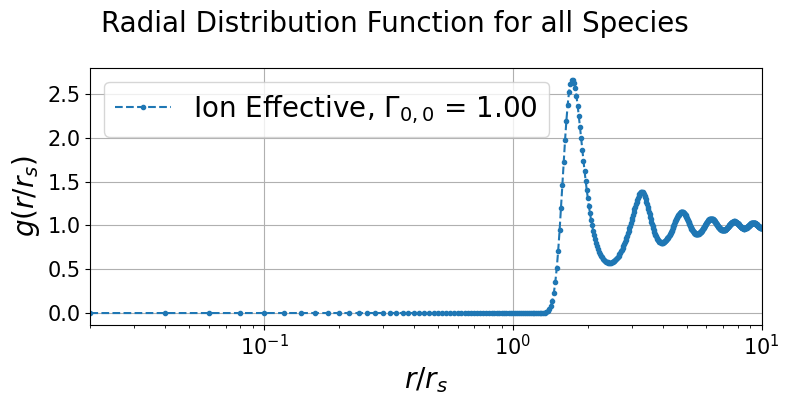

In [20]:
hnc_check.plot_g_all_species()

NameError: name 'hnc_luke' is not defined

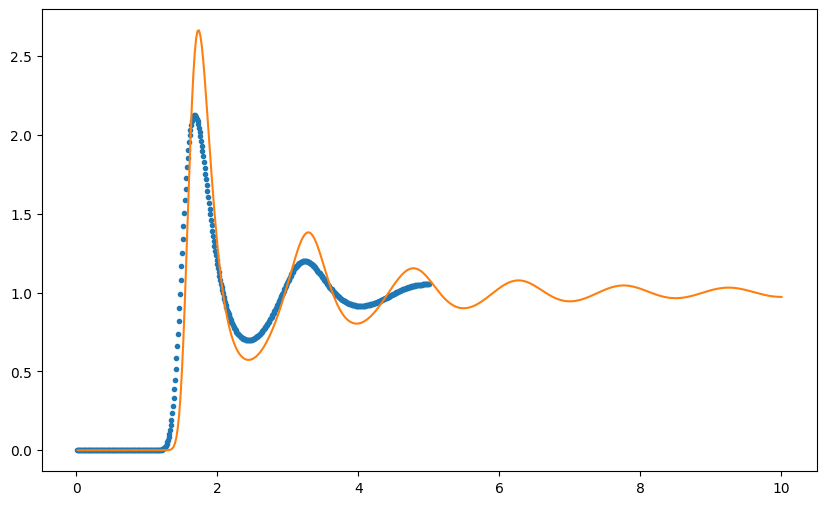

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(hnc2.r_array, hnc2.h_r_matrix[0,0]+1,'.', label="Two Actual Species")
ax.plot(hnc_check.r_array, hnc_check.h_r_matrix[0,0]+1,'-', label="One Effective Species")
ax.plot(hnc_luke.r_array, hnc_luke.h_r_matrix[0,0]+1,'-', label="Luke HNC with Force Matched V")
ax.set_ylabel(r'$g(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
ax.set_ylim(-0.1,3)
ax.set_xlim(0,5)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)

# Curve Fitting

In [ ]:
from scipy.optimize import curve_fit

def yukawa_fit(r, Γ, κ,p):
    return  Γ/r*np.exp(-κ*r)

def yukawa_remaining_fit(r,a,b,c,d):
    return 1/(a+b*np.exp(c*(hnc2.r_array-d)))

def LJ_fit(r, a,b,m,n):
    return  1/(a*r**m + b/r**n) #+ v0

def yukawa_friedel_fit(r, Γ, κ1, a,κ2, k,  δ, v0):
    return  Γ/r*np.exp(-κ1*r) + a/r**3*np.exp(-κ2*r)*np.cos(k*r+δ) + v0

def yukawa_plus_fit(r, Γ, κ1, a,b,c):
    return  Γ/r*np.exp(-κ1*r)/(1+np.exp(b*(hnc2.r_array-c)))
# last_inf_index = int(np.argwhere(np.isinf(hnc2.βueff_r_matrix[0,0]))[-1] )

y_vals = curve_fit(yukawa_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0])
y_fit_data  = yukawa_fit(hnc2.r_array, y_vals[0][0],y_vals[0][1],y_vals[0][2])

y_remaining_vals = curve_fit(yukawa_remaining_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0]/y_fit_data)
y_remaining_fit_data  = yukawa_remaining_fit(hnc2.r_array, y_remaining_vals[0][0],y_remaining_vals[0][1],y_remaining_vals[0][2],y_remaining_vals[0][3])


# LJ_vals = curve_fit(LJ_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0],maxfev=int(1e5))
# yf_vals= curve_fit(yukawa_friedel_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0],maxfev=int(1e5))
# yp_vals= curve_fit(yukawa_plus_fit, hnc2.r_array, hnc2.βueff_r_matrix[0,0],maxfev=int(1e3))

In [ ]:
y_vals[0], y_remaining_vals[0]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

g_data = hnc2.h_r_matrix[0,0] + 1

# LJ_fit_data  = LJ_fit(hnc2.r_array, LJ_vals[0][0],LJ_vals[0][1],LJ_vals[0][2],LJ_vals[0][3])
# yf_fit_data = yukawa_friedel_fit(hnc2.r_array, yf_vals[0][0],yf_vals[0][1],yf_vals[0][2],yf_vals[0][3],yf_vals[0][4],yf_vals[0][5],yf_vals[0][6])
# yp_fit_data = yukawa_plus_fit(hnc2.r_array, yp_vals[0][0],yp_vals[0][1],yp_vals[0][2],yp_vals[0][3],yp_vals[0][4])


ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0],'k-', label="Effective")
# ax.plot(hnc2.r_array, y_fit_data*y_remaining_fit_data,'--', label="Yukawa Fit")
ax.plot(hnc2.r_array, 81.87504124/hnc2.r_array*np.exp(-0.99115223*hnc2.r_array)/(0.92620556+0.7351028*np.exp(1.72217623*(hnc2.r_array-1.75197859))),'--', label="Fit")
# ax.plot(hnc2.r_array[1:], hnc2.βueff_r_matrix[0,0][1:]-hnc2.βueff_r_matrix[0,0][:-1],'k-', label="Effective")
# ax.plot(hnc2.r_array[1:], (y_fit_data*y_remaining_fit_data)[1:]-(y_fit_data*y_remaining_fit_data)[:-1],'--', label="Yukawa Fit")

# ax.plot(hnc2.r_array, LJ_fit_data,'--', label="Yukawa Fit")
# ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0]-y_fit_data*y_remaining_fit_data,'.', label="Yukawa Fit Ratio")
 
# ax.plot(hnc2.r_array,y_remaining_fit_data,'.', label="Yukawa Remaining Fit")

# ax.plot(hnc2.r_array, yf_fit_data,'.', label="Yukawa-Friedel Fit")
# ax.plot(hnc2.r_array, yp_fit_data,'.', label="Yukawa-Plus Fit")
# ax.plot(hnc2.r_array, hnc2.βueff_r_matrix[0,0]/yp_fit_data,'.', label="Yukawa-Plus Fit Ratio")
# ax.plot(hnc2.r_array, 1/(1+np.exp(3*(hnc2.r_array-2.5))),'.', label="Yukawa-Friedel Fit")

ax.set_ylabel(r'$\beta u(r/r_s)$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=20)
# ax.set_ylim(-2,2)
ax.set_yscale('symlog',linthresh=1e-1)
ax.set_xlim(0,10)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)

In [ ]:
from scipy.interpolate import RBFInterpolator



RBFInterpolator(hnc2.r_array, hnc2.βueff_r_matrix[0,0]/y_fit_data)